# Week 1 exercises

This notebook follows the first weeks exercises given in Corp.Fintech. We start by downloading or loading the files needed for this exercise. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
try:
    df = pd.read_csv("ETH_EUR.csv", index_col = 0)
    df2 = pd.read_csv("NASDAQOMX.csv", index_col = 0) 
except FileNotFoundError:
    import quandl
    df = quandl.get("GDAX/ETH_EUR", authtoken = "3CdfXCg8D_CWBs7UAwKr", index_col = 0)
    df2 = quandl.get("NASDAQOMX/OMXN40", authtoken= "3CdfXCg8D_CWBs7UAwKr", index_col = 0)
    df.to_csv("ETH_EUR", encoding = "utf-8")
    df2.to_csv("NASDAQOMX", encoding = "utf-8")


Firstly I need to look what variables we have.

In [4]:
print(df.head())
print("======================================================================================")
print(df2.head())

              Open    High     Low       Volume
Date                                           
30/05/2017  179.46  201.56  179.46   563.574044
31/05/2017  201.49  210.31  192.10  1823.492476
01/06/2017  205.00  211.20  180.00  4272.726510
02/06/2017  192.34  204.54  192.34  1890.842875
03/06/2017  197.00  201.22  196.52   604.755356
            Index Value  High  Low  Total Market Value  Dividend Market Value
Trade Date                                                                   
17/11/2008       638.85   0.0  0.0        2.258580e+11                    0.0
18/11/2008       636.30   0.0  0.0        2.249560e+11                    0.0
19/11/2008       609.51   0.0  0.0        2.154880e+11                    0.0
20/11/2008       591.20   0.0  0.0        2.090120e+11                    0.0
24/11/2008       621.92   0.0  0.0        2.198740e+11                    0.0


The names of the EUT/EUR look just fine, but for the NASDQOMX they seem to be long and hard to write in later coding so I will give them a new name.

In [5]:
df2 = df2.rename(columns = {"Dividend Market Value":"Dividend",
                      "Total Market Value": "Total", "Index Value":"Index"})
df2

,Index,High,Low,Total,Dividend
Trade Date,,,,,
17/11/2008,638.85,0.00,0.00,2.258580e+11,0.0
18/11/2008,636.30,0.00,0.00,2.249560e+11,0.0
19/11/2008,609.51,0.00,0.00,2.154880e+11,0.0
20/11/2008,591.20,0.00,0.00,2.090120e+11,0.0
24/11/2008,621.92,0.00,0.00,2.198740e+11,0.0
...,...,...,...,...,...
31/01/2020,1706.09,1726.58,1702.43,6.318630e+11,0.0
03/02/2020,1708.42,1713.39,1699.99,6.327260e+11,0.0
04/02/2020,1741.83,1741.83,1711.70,6.451010e+11,0.0


It may or may not be necessary but I might down the line want to work with just one data frame instead of two so I am going the define a function that does just that. Since I have the dates as index I will simply use the index as the key that joins the data frames.

In [8]:
def nDfjoin(df, df2):
    '''
    This function will join the two data frames. It is good to note that it will join based
    on the first data frame given. So carefull consideration needs to be made about
    wich one will be the first, if it is something that might be an issue
    ########################################################################################
    ########################### This will DROP NaN values ##################################
    ########################################################################################
    '''
    df3 = df.join(df2, lsuffix = "_df", rsuffix = "_df2")
    return(df3.dropna())

df3 = nDfjoin(df, df2)
print(df3)

              Open  High_df  Low_df        Volume    Index  High_df2  Low_df2  \
Date                                                                            
30/05/2017  179.46   201.56  179.46    563.574044  1604.93   1604.94  1592.22   
31/05/2017  201.49   210.31  192.10   1823.492476  1609.29   1618.19  1606.28   
01/06/2017  205.00   211.20  180.00   4272.726510  1616.64   1618.88  1606.89   
02/06/2017  192.34   204.54  192.34   1890.842875  1627.62   1634.45  1619.65   
05/06/2017  219.08   220.50  215.93    989.035813  1622.15   1630.77  1620.54   
...            ...      ...     ...           ...      ...       ...      ...   
24/01/2020  147.28   149.21  140.90  13107.359420  1746.24   1754.65  1735.22   
28/01/2020  154.34   158.64  153.91  13955.558070  1718.55   1722.17  1694.01   
30/01/2020  159.54   168.90  155.09  19505.553120  1712.50   1731.09  1709.76   
31/01/2020  168.90   169.54  158.50  15066.628160  1706.09   1726.58  1702.43   
03/02/2020  171.10   176.00 

Next I want to look at some descriptive stats. Now this next function can give the stats for a specific year or for all the years combined, so there are things to consider when running this function specially given this limitation. 

In [9]:
def nDescriptive(df, year = 0):
    '''
    Making a function that prints some descriptive numbers
    for each column. 
    TODO: Print out the descriptives for each year 
    '''
    nList = list(df.columns.values)
    df["years"] = pd.DatetimeIndex(df.index).year

    if year > 0:
        for i in nList[:-1]:
            print("======================================================")
            print("Total per",year, "for ",i)
            print(f"The Mean: {df[i].loc[df.years == year].mean()}")
            print(f"The Median: {df[i].loc[df.years == year].median()}")
            print(f"The Std: {df[i].loc[df.years == year].std()}")
            print(f"The quantile: {df[i].loc[df.years == year].quantile([0.25,0.5,0.75])}")
    elif year == 0:
        print("Total for all years in the dataset.")
        for i in nList[:-1]:
            print("======================================================")
            print(i)
            print(f"The Mean: {df[i].mean()}")
            print(f"The Median: {df[i].median()}")
            print(f"The Std: {df[i].std()}")
            print(f"The quantile: {df[i].quantile([0.25,0.5,0.75])}")

nDescriptive(df3, year = 0)

Total for all years in the dataset.
Open
The Mean: 325.26150197628453
The Median: 254.915
The Std: 203.97305535440432
The quantile: 0.25    178.925
0.50    254.915
0.75    403.575
Name: Open, dtype: float64
High_df
The Mean: 339.26988142292487
The Median: 262.625
The Std: 215.12868479901104
The quantile: 0.25    191.2450
0.50    262.6250
0.75    417.5175
Name: High_df, dtype: float64
Low_df
The Mean: 307.9375296442688
The Median: 244.675
The Std: 189.39672390766046
The quantile: 0.25    170.5575
0.50    244.6750
0.75    391.3850
Name: Low_df, dtype: float64
Volume
The Mean: 16064.055748440316
The Median: 11234.088735000001
The Std: 16282.28356127212
The quantile: 0.25     7106.652347
0.50    11234.088735
0.75    18535.641235
Name: Volume, dtype: float64
Index
The Mean: 1561.9048221343876
The Median: 1564.44
The Std: 57.56735677798611
The quantile: 0.25    1522.9075
0.50    1564.4400
0.75    1595.2850
Name: Index, dtype: float64
High_df2
The Mean: 1566.353537549407
The Median: 1570.3899

I am a sucker for the 50/200 day moving average. So here I want to do just that. It is very descriptive in what kind of trend is in the data and what one might expect to happen in the future, plus its very informative visually. 

In [10]:
def nVis(df, y, roll):
    '''
    This function was supposed to be a 50/200 day moving average but right now it can
    take in either a single value or a list of values for the moving averages. 
    '''
    if isinstance(roll, list):
        plt.figure(figsize = (16,5), dpi = 100)
        plt.plot(df.index, df[y], color = "tab:red", label = y)
        plt.gca().set(title = "Moving averages", xlabel = "Date", ylabel = y)
        for i in (roll):
            df[f"ma{i}"] = df[y].rolling(window = i, min_periods = 0).mean()
            plt.plot(df.index, df[f"ma{i}"], label = df[f"ma{i}"].name)
    else:
        df[f"ma{roll}"] = df[y].rolling(window = roll, min_periods = 0).mean()
        plt.figure(figsize = (16,5), dpi = 100)
        plt.plot(df.index, df[f"ma{roll}"], label = df[f"ma{roll}"].name)
        plt.plot(df.index, df[y], color = "tab:red", label = y)
        plt.gca().set(title = "Moving averages", xlabel = "Date", ylabel = y)
    plt.legend()
    plt.show()


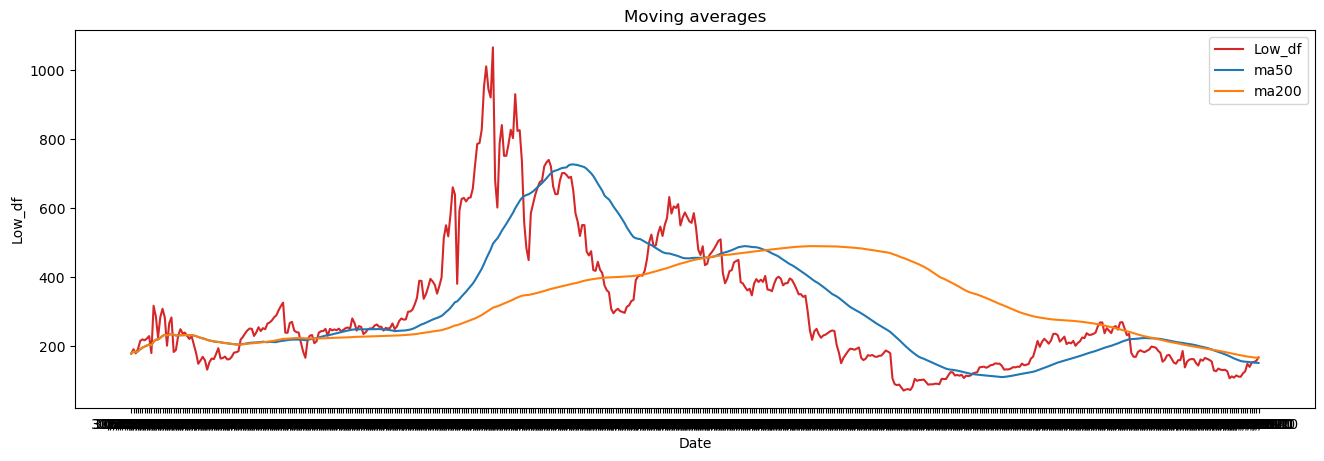

In [29]:
a = [50, 200]
nVis(df3, "Low_df", roll = a)

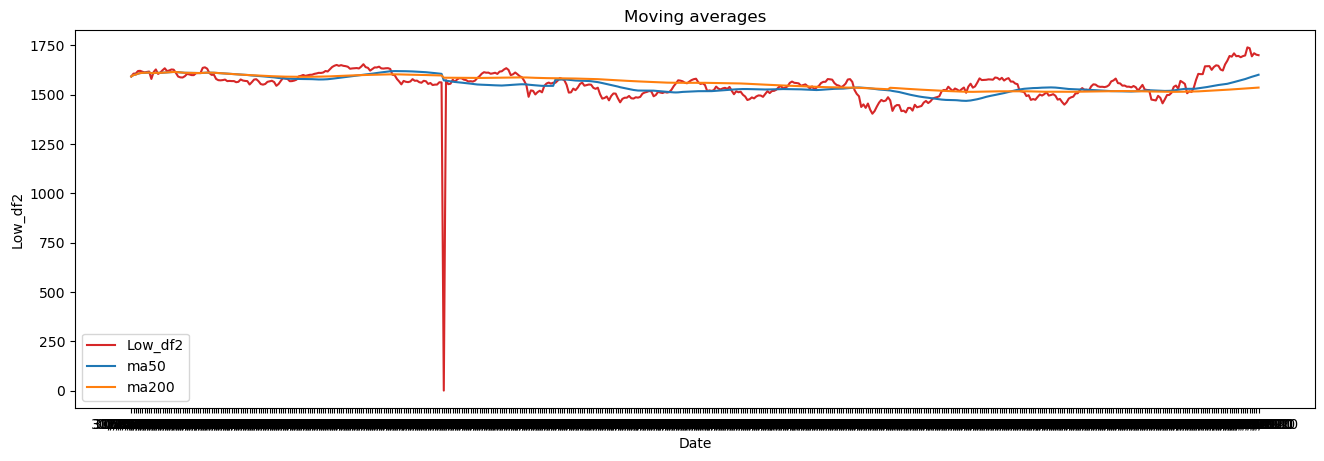

In [30]:
nVis(df3, "Low_df2", roll = a)

Ok, there is something wrong here. I need to find that value and replace it with something reasonable. I have chosen to find the two values to the either side of this day and use the average of those two to create this value. It is my best approximation of that value and the most reasonable as to not corrupt the the data

In [43]:
print(df3.loc[df3["Low_df2"]==0])
print(df3.loc[df3.index == "14/12/2017"])
a = 1561.77
b = 1573.18
c = a+b
df3.loc[df3["Low_df2"] == 0] = c/2
print(df3.loc[df3["Low_df2"] == 0]) ## Should give an error
print(df3.loc[df3.index == "13/12/2017"])

Empty DataFrame
Columns: [Open, High_df, Low_df, Volume, Index, High_df2, Low_df2, Total, Dividend, years, ma50, ma200, logLow_df, volLow_df, logLow_df2, volLow_df2]
Index: []
              Open  High_df  Low_df       Volume   Index  High_df2  Low_df2  \
Date                                                                          
14/12/2017  592.31    631.0   551.0  34272.61839  1573.2    1583.9  1573.18   

                   Total  Dividend   years       ma50       ma200  logLow_df  \
Date                                                                           
14/12/2017  6.023490e+11       0.0  2017.0  1570.9626  1585.65507   0.857897   

            volLow_df  logLow_df2  volLow_df2  
Date                                           
14/12/2017        NaN    1.000494         NaN  
Empty DataFrame
Columns: [Open, High_df, Low_df, Volume, Index, High_df2, Low_df2, Total, Dividend, years, ma50, ma200, logLow_df, volLow_df, logLow_df2, volLow_df2]
Index: []
                Open   Hi

So lets try and do the same visualization.

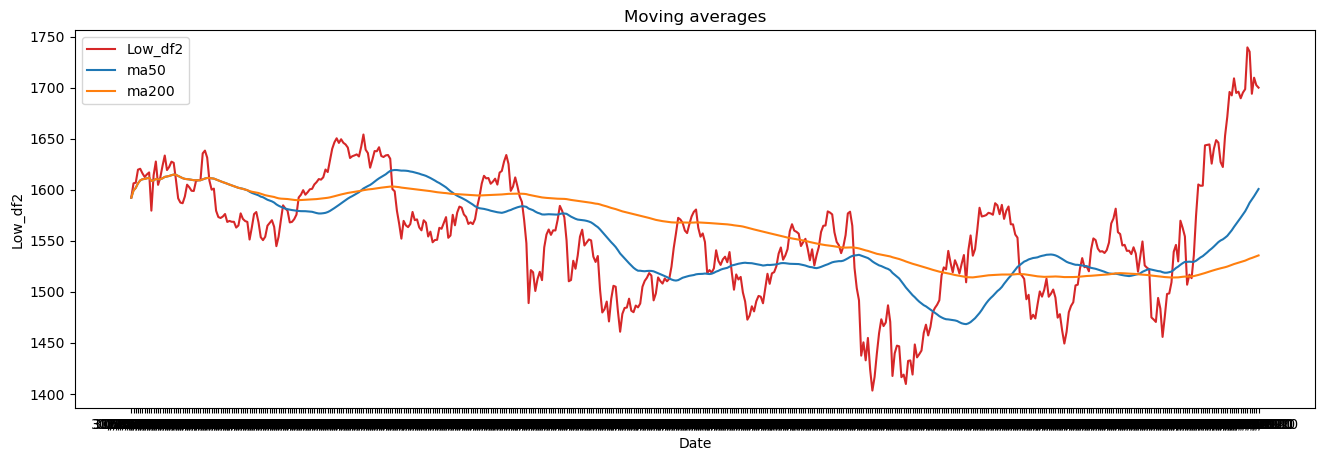

In [44]:
a = [50,200]
nVis(df3, "Low_df2", roll = a)

Now there are somethings that still need to be done. Following the example from the book I will calculate the log returns of the variables of interest. In this case its going to be the Low variables, but to make things easy I will construct a function that will create new variables that will be those new log transformed variables. 

In [39]:
def nLogReturns(df, x):
    '''
    This function takes a data frame and the column
    that is to be used to calculate log returns. 
    For this function I will not add a time seperator since
    it is not neccissary in this case.
    '''
    df[f"log{x}"] = np.log(df[x]) / np.log(df[x].shift(1))
    df[f"vol{x}"] = df[f"log{x}"].rolling(252).std() * np.sqrt(252)

In [41]:
nLogReturns(df3, "Low_df")
nLogReturns(df3, "Low_df2")

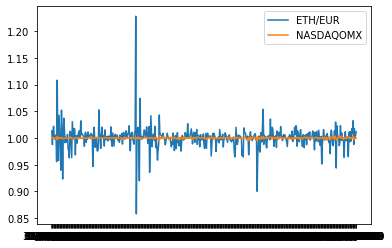

In [47]:
plt.plot(df3.index,df3["logLow_df"], label = "ETH/EUR")
plt.plot(df3.index, df3["logLow_df2"], label = "NASDAQOMX")
plt.legend()
plt.show()

As we can see from this graph there is some huge fluctuation in the ETH/EUR exchange rate when plotted against NASDAQ, but if you look at the nLogreturn function it does calculate the volatility as well, lets have a look at that

c:\users\eirik\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


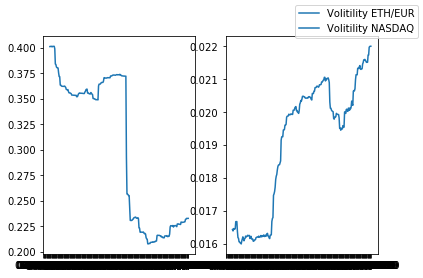

In [57]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
axes[0].plot(df3.index, df3["volLow_df"], label = "Volitility ETH/EUR")
axes[1].plot(df3.index, df3["volLow_df2"], label = "Volitility NASDAQ")
fig.legend()
fig.show()


# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
# axes[0].plot(x1, y1)
# axes[1].plot(x2, y2)
# fig.tight_layout()

These two side-by-side plots seem to suggest a rather strong negative correlation between the two, we can confirm this by doing a simple correlation calculation. 

In [58]:
print("Correlation for the log return of the two variables")
print(df3["logLow_df"].corr(df3["logLow_df2"]))
print("====================================================================")
print("Correlation for the volatility of the two variables")
print(df3["volLow_df"].corr(df3["volLow_df2"]))

Correlation for the log return of the two variables
0.13399489954065022
Correlation for the volatility of the two variables
-0.6695171801057792


This is by no means an accurate number since it does not take into account time, so an autocorrelation function would be better in finding out if there is any correlation over time. Also a lagplot would be very good at spotting out if there is indeed a relationship between the two. 